In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)

In [2]:
# Load the VGG19 model
# https://keras.io/api/applications/vgg/#vgg19-function
model = VGG19(include_top=True, weights='imagenet')

In [3]:
# Define default image size for VGG19
image_size = (224, 224)

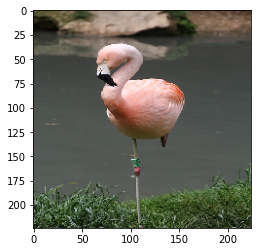

In [4]:
# Load the image and resize to default image size
image_path = os.path.join("..", "Images", "bird1.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [13]:
# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
print (x)
x = np.expand_dims(x, axis=0)
# print (x)
x = preprocess_input(x)
# print (x)

[[[116. 100.  74.]
  [115. 101.  74.]
  [110.  99.  71.]
  ...
  [ 68.  50.  40.]
  [ 67.  49.  39.]
  [ 73.  54.  47.]]

 [[ 94.  79.  56.]
  [ 98.  84.  58.]
  [104.  93.  65.]
  ...
  [ 75.  57.  45.]
  [ 72.  54.  42.]
  [ 69.  51.  41.]]

 [[ 65.  59.  33.]
  [ 73.  67.  41.]
  [ 75.  70.  41.]
  ...
  [ 81.  62.  48.]
  [ 71.  51.  40.]
  [ 74.  54.  43.]]

 ...

 [[ 65.  85.  57.]
  [ 31.  47.  21.]
  [ 28.  40.  20.]
  ...
  [ 12.  20.   5.]
  [ 26.  38.  18.]
  [100. 112.  90.]]

 [[ 13.  33.   6.]
  [ 47.  65.  41.]
  [ 36.  49.  29.]
  ...
  [112. 120. 105.]
  [ 48.  57.  38.]
  [ 13.  22.   1.]]

 [[ 45.  63.  37.]
  [ 34.  54.  29.]
  [ 29.  44.  23.]
  ...
  [ 42.  50.  35.]
  [ 89. 101.  81.]
  [ 79.  89.  65.]]]


Predicted: [('n02007558', 'flamingo', 0.96581215), ('n01855672', 'goose', 0.010761659), ('n02006656', 'spoonbill', 0.009033224)]


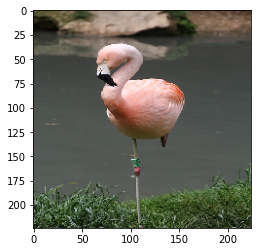

In [16]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

In [8]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3))

Predicted: [[('n01622779', 'great_grey_owl', 0.93700147), ('n01608432', 'kite', 0.007953646), ('n02018795', 'bustard', 0.006644994)]]


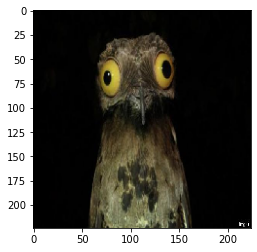

In [9]:
image_path = os.path.join("..", "Images", "bird2.jpg")
predict(image_path)

Predicted: [[('n01614925', 'bald_eagle', 0.94989616), ('n01608432', 'kite', 0.050100494), ('n01616318', 'vulture', 3.2003456e-06)]]


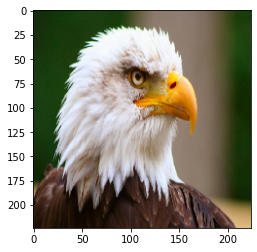

In [19]:
image_path = os.path.join("..", "Images", "eagle.jpg")
predict(image_path)